In [1]:
from sklearn import datasets

circles_data, circles_data_labels = datasets.make_circles(n_samples=100,factor=0.1,noise=0.1)

In [2]:
from sklearn.model_selection import train_test_split
import torch

# divide data into 70% train and 30% test sets
X_train, X_test, y_train, y_test = train_test_split(circles_data, circles_data_labels, test_size=0.3, random_state=42)

# To tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train) 
y_test_tensor = torch.tensor(y_test)

In [3]:
import numpy as np
import torch.nn as nn
import torch.optim as optim

class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(2, 8)   
        self.fc2 = nn.Linear(8, 2)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = FCN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

In [4]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = (predicted == y_test_tensor).float().mean().item()

# Output the testing accuracy
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 1.0000


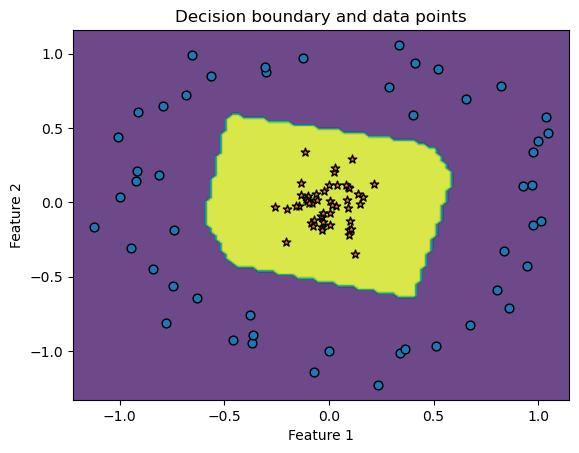

In [5]:
import matplotlib.pyplot as plt

# Generate a grid of points to visualize the decision boundary
x_min, x_max = circles_data[:, 0].min() - 0.1, circles_data[:, 0].max() + 0.1
y_min, y_max = circles_data[:, 1].min() - 0.1, circles_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict classes using trained model for every point on the grid
model.eval()
with torch.no_grad():
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    #print(Z)
    Z = Z.argmax(dim=1).numpy()
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(circles_data[circles_data_labels == 0, 0], circles_data[circles_data_labels == 0, 1], s=40, edgecolor='k', marker='o')
plt.scatter(circles_data[circles_data_labels == 1, 0], circles_data[circles_data_labels == 1, 1], s=40, edgecolor='k', marker='*')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision boundary and data points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()